In [22]:
# load necessary libraries
library(DBI)
library(corrgram)
library(caret)
library(gridExtra)
library(ggpubr)
library(reshape2)

## Turn Off warnings
options( warn = -1 )

# process in parallel on Windows
#library(doParallel) 
#cl <- makeCluster(detectCores(), type='PSOCK')
#registerDoParallel(cl)

# For MAC OSX and Unix like System
library(doMC)
registerDoMC(cores = 4)

In [23]:
# Load the DataSets: Titanic training Data
dataSet <- read.csv("international-airline-passengers.csv", header = TRUE, sep = ',')
colnames(dataSet)

[1] "Month"     "Passenger"

Month,Passenger
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121
1949-06,135
1949-07,148
1949-08,148
1949-09,136
1949-10,119


,Month,Passenger
135,1960-03,419
136,1960-04,461
137,1960-05,472
138,1960-06,535
139,1960-07,622
140,1960-08,606
141,1960-09,508
142,1960-10,461
143,1960-11,390
144,1960-12,432


[1] 144   2


 factor integer 
      1       1 

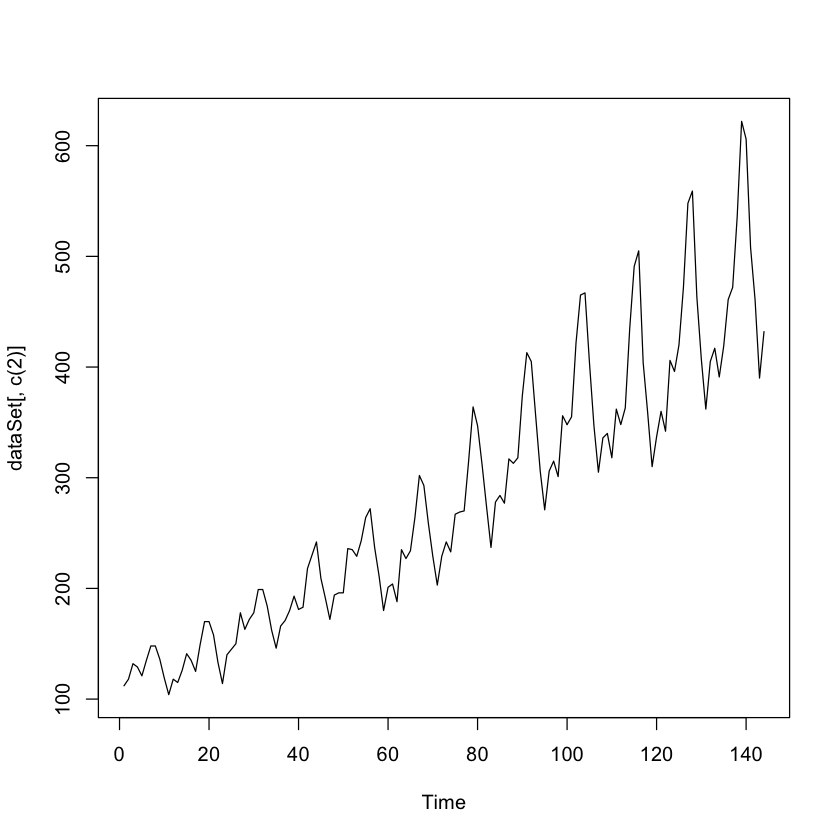

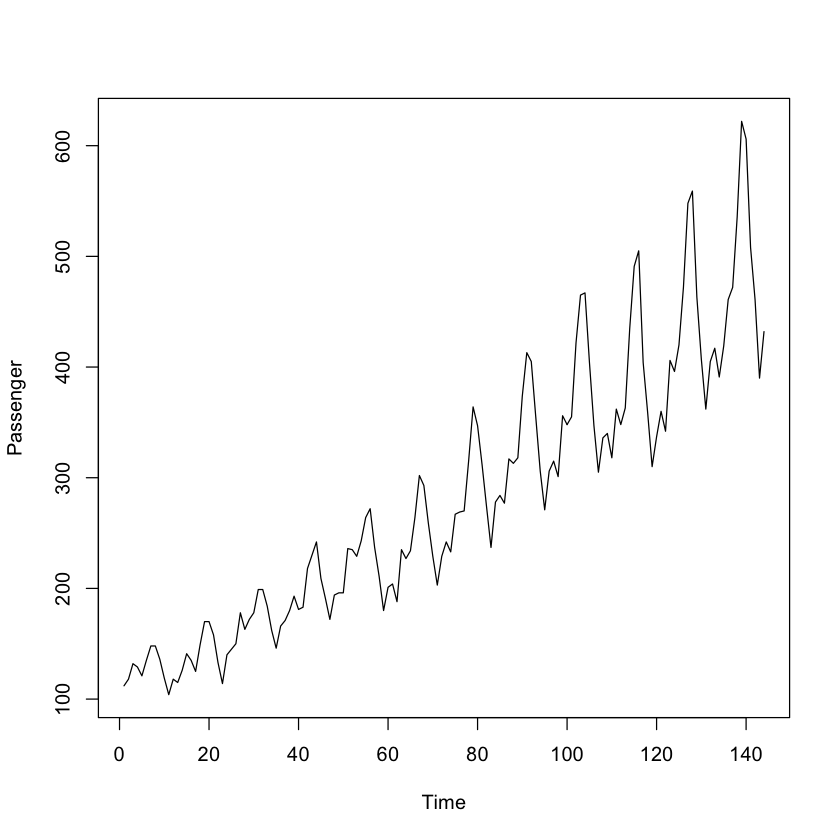

In [24]:
# Print top 10 rows in the dataSet
head(dataSet, 10)
# Print last 10 rows in the dataSet
tail(dataSet, 10)
# Dimention of Dataset
dim(dataSet)
# Check Data types of each column
table(unlist(lapply(dataSet, class)))

plot.ts(dataSet[, c(2)])
plot.ts(dataSet["Passenger"])

In [25]:
# Covert the dataset to a vactor i.e. creating "y" variable
dataSet  <- as.numeric(dataSet[, c("Passenger")])

# Create "x" variable as row numbers / names
names(dataSet) <- 1:length(dataSet)

df <- cbind(read.table(text = names(dataSet)), dataSet)
x = df$V1; y = df$dataSet

In [26]:
# Define the Linear model: y = b * x + a
Model = lm(y ~ x)

# Summarise the fitted model 
summary(Model)


Call:
lm(formula = y ~ x)

Residuals:
    Min      1Q  Median      3Q     Max 
-93.858 -30.727  -5.757  24.489 164.999 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 87.65278    7.71635   11.36   <2e-16 ***
x            2.65718    0.09233   28.78   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 46.06 on 142 degrees of freedom
Multiple R-squared:  0.8536,	Adjusted R-squared:  0.8526 
F-statistic: 828.2 on 1 and 142 DF,  p-value: < 2.2e-16


In [27]:
# Summarise the r_squared for actual and fitted data 
r2 <- cor(fitted(Model), y)^2
summary(Model)$r.squared 
print(r2)

[1] 0.8536382

[1] 0.8536382


In [28]:
# Generate the equations
paste('y =', coef(Model)[[2]], '* x', '+', coef(Model)[[1]])

# Generate the trendline and fitted values
tendency  = coef(Model)[[2]] * x + coef(Model)[[1]]
print(tendency)

[1] "y = 2.65718390804598 * x + 87.6527777777778"

  [1]  90.30996  92.96715  95.62433  98.28151 100.93870 103.59588 106.25307
  [8] 108.91025 111.56743 114.22462 116.88180 119.53898 122.19617 124.85335
 [15] 127.51054 130.16772 132.82490 135.48209 138.13927 140.79646 143.45364
 [22] 146.11082 148.76801 151.42519 154.08238 156.73956 159.39674 162.05393
 [29] 164.71111 167.36830 170.02548 172.68266 175.33985 177.99703 180.65421
 [36] 183.31140 185.96858 188.62577 191.28295 193.94013 196.59732 199.25450
 [43] 201.91169 204.56887 207.22605 209.88324 212.54042 215.19761 217.85479
 [50] 220.51197 223.16916 225.82634 228.48352 231.14071 233.79789 236.45508
 [57] 239.11226 241.76944 244.42663 247.08381 249.74100 252.39818 255.05536
 [64] 257.71255 260.36973 263.02692 265.68410 268.34128 270.99847 273.65565
 [71] 276.31284 278.97002 281.62720 284.28439 286.94157 289.59875 292.25594
 [78] 294.91312 297.57031 300.22749 302.88467 305.54186 308.19904 310.85623
 [85] 313.51341 316.17059 318.82778 321.48496 324.14215 326.79933 329.45651
 [92] 332.11

In [29]:
# Generate the forecast in the future time horizon
steps = 25
x_in_Future <- (length(x)+1) : (length(x)+steps)

forecastedValues  = coef(Model)[[2]]  * x_in_Future + coef(Model)[[1]];  print(forecastedValues)

 [1] 472.9444 475.6016 478.2588 480.9160 483.5732 486.2304 488.8875 491.5447
 [9] 494.2019 496.8591 499.5163 502.1735 504.8307 507.4878 510.1450 512.8022
[17] 515.4594 518.1166 520.7738 523.4309 526.0881 528.7453 531.4025 534.0597
[25] 536.7169


In [32]:
# Plotting Observed versus Predicted
res <- stack(data.frame(Observed = c(y,forecastedValues), 
                        Predicted = c(tendency, forecastedValues)))
res <- cbind(res, x = rep(c(x,x_in_Future) , 2))


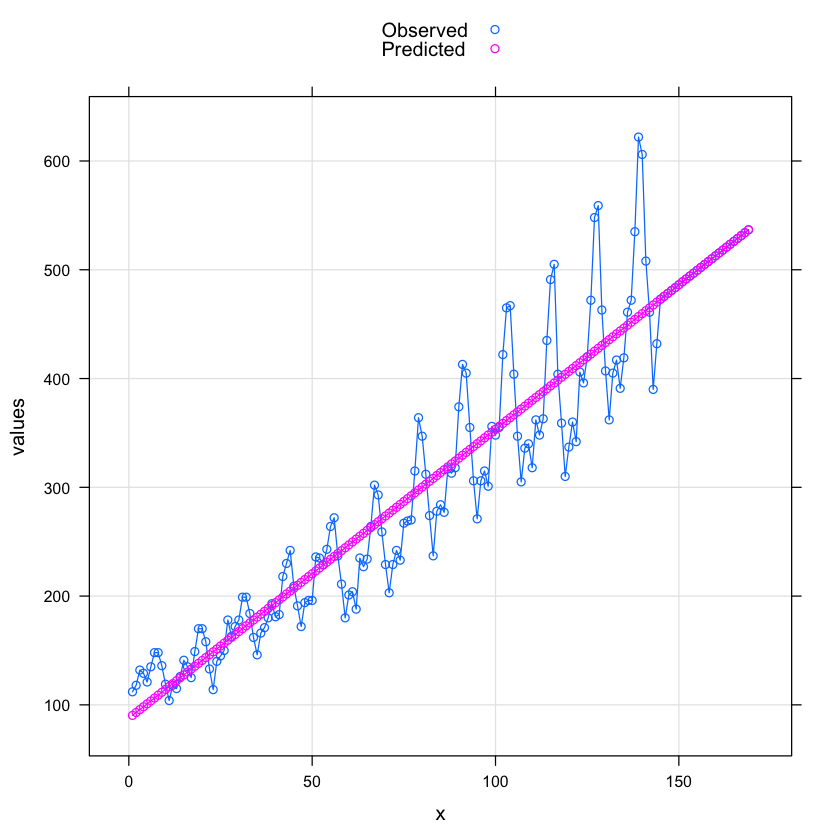

In [33]:
require("lattice")
g1 <- xyplot(values ~ x, data = res, group = ind, auto.key = TRUE, grid = TRUE,
             type=c("p","l"))

library(gridExtra)
grid.arrange(g1, nrow = 1)